# Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from procmodeling import solver

from scipy.integrate import odeint

# Solve the EDO

In [ ]:
equations = """
# y[0] = prey population
# y[1] = predator population
# dydt[0] = rate of change of prey over time
# dydt[1] = rate of change of predators over time

dydt[0] = a * y[0] - b * y[0] * y[1]
dydt[1] = d * y[0] * y[1] - g * y[1]

# Define the parameters:
a = 1.0    # prey birth rate
b = 0.1    # predation rate
d = 0.075  # predator growth rate
g = 1.5    # predator death rate
"""

Load the equations and check if they are correct

edo_functions: Docstring was read


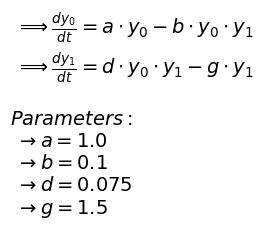

In [3]:
edo = solver.edo_functions(equations)

Solve the ODE from t = 0 to t = 15, with initial conditions prey = 40 and predator = 10

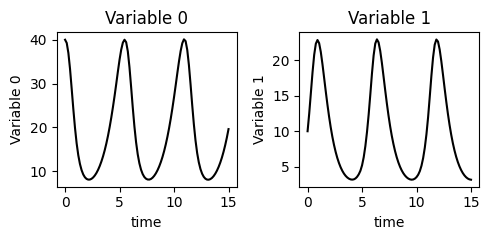

In [4]:
edo.solve(t_span=[0,15],y0=[40, 10])

# Optimize the EDO

## Generate data with diferents parameters to adjustment

In [5]:
# Lotka-Volterra System
params = {'a': 0.6, 'b': 0.025, 'd': 0.02, 'g': 0.8}
lotka_volterra_system = edo._call_function( edo._repl_equations.values(), params)

# Let's set 3 initial conditions (x0, y0):
initial_conditions = [(40, 10), (10, 30), (50, 5)]

generated_data = pd.DataFrame(columns=['x0', 'y0', 'time', 'prey', 'predator'])

for z0 in initial_conditions:
    # Time vector
    t = np.linspace(0, 20, 10)

    # Deterministic solution (without noise)
    solution = odeint(lotka_volterra_system, z0, t, tfirst=True)
    prey = solution[:, 0]
    predator = solution[:, 1]

    # Add Gaussian noise (set noise intensity)
    noise_level_prey = 5
    noise_level_predator = 2

    np.random.seed(42)  # for reproducibility
    prey_noisy = prey + np.random.normal(0, noise_level_prey, size=prey.shape)
    predator_noisy = predator + np.random.normal(0, noise_level_predator, size=predator.shape)

    # Ensure populations do not become negative
    prey_noisy = np.clip(prey_noisy, a_min=0, a_max=None)
    predator_noisy = np.clip(predator_noisy, a_min=0, a_max=None)

    # Add generated data to the "generated_data" DataFrame
    data_array = np.array([
        [z0[0]] * len(t),
        [z0[1]] * len(t),
        t,
        prey_noisy,
        predator_noisy
    ])

    data_df = pd.DataFrame(data_array.T, columns=generated_data.columns)
    generated_data = pd.concat([generated_data, data_df], axis=0, ignore_index=True)

    # Plot (optional)
    # plt.figure(figsize=(12, 6))
    # plt.scatter(t, prey_noisy, label='Prey (noisy)', color='blue', alpha=0.7)
    # plt.scatter(t, predator_noisy, label='Predator (noisy)', color='red', alpha=0.7)
    # plt.xlabel('Time')
    # plt.ylabel('Population')
    # plt.title('Lotka-Volterra Simulation with Noise')
    # plt.legend()
    # plt.grid(True)
    # plt.show()

generated_data


C:\Users\Lhucas Tenorio\AppData\Local\Temp\ipykernel_8256\2253119809.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  generated_data = pd.concat([generated_data, data_df], axis=0, ignore_index=True)


,x0,y0,time,prey,predator
0,40.0,10.0,0.000000,42.483571,9.073165
1,40.0,10.0,2.222222,71.609228,20.811560
2,40.0,10.0,4.444444,35.619743,46.397620
3,40.0,10.0,6.666667,26.863078,17.166980
4,40.0,10.0,8.888889,31.657863,6.983996
5,40.0,10.0,11.111111,65.500936,14.321668
6,40.0,10.0,13.333333,52.803091,44.808013
7,40.0,10.0,15.555556,23.005393,27.281517
8,40.0,10.0,17.777778,24.925488,9.889463
9,40.0,10.0,20.000000,60.133934,9.167528


## Set the optimization parameters and adjust the EDO

Note: the algorithm uses an optimization method called 'Differential Evolution'. That’s why it takes so long.

 77%|███████▋  | 77/100 [02:32<00:45,  1.98s/it]


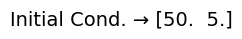

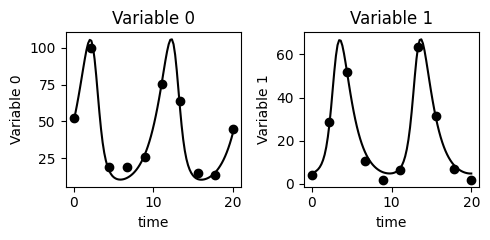

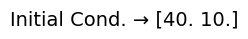

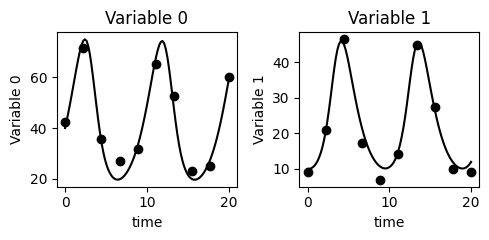

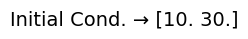

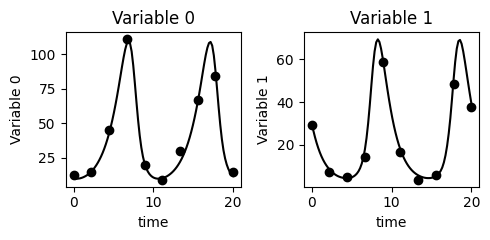

In [6]:
bounds = {'a': (0.1, 2),
        'b': (0.01, 0.2),
        'd': (0.001, 0.5),
        'g': (0.5, 3)
    }

initial_conditions_columns = [ 'x0', 'y0' ]

edo.optimize(
    data = generated_data,
    initial_values_columns = initial_conditions_columns,
    target_values_columns = ['prey', 'predator'],
    time_column = 'time',
    bounds = bounds
)

Optimal parameters

In [7]:
edo.opt_params

{'a': np.float64(0.6190957675447406),
 'b': np.float64(0.026207578039271803),
 'd': np.float64(0.01894558771081642),
 'g': np.float64(0.7783700145061343)}